# Ordinary Differencial Equations 

# Differenciálegyenletek megoldása


Kezdjük a következő nagyon egyszerű példával ... egy elsőrendű diffegyenlet különböző kezdeti értékben törőnő elemzésével. 

Consider $y' = x - y$.

We can interpret this equation as one that defines a direction field. That is, at any given point (x, y) we can compute the derivative of a solution at that point. We will consider how to make a plot that shows this field, and that will help us estimate what solutions to the ODE might look like for different initial values.

To do this, we should compute the derivative on an array of regularly spaced points in both $x$ and $y$, and then making a plot of that data.

We need to see a couple of new ideas to make this plot efficiently. What we want is a 2-d plot of a regular grid of (x, y) points, and at each of those points the derivative (dx/dx, dy/dx).

First, we will need to create four arrays:

1.  a 2d array of all the x-positions
2.  a 2d array of all the y-positions
3.  a 2d array of the dx/dx = 1 values
4.  a 2d array of the dy/dx values.

We want to generate the x, y arrays. We use `np.meshgrid` for this. The simplest way to do it is to use `np.linspace` to create 1-D arrays with the spacing we want, and then use `np.meshgrid` to generate the 2D arrays. Let's say we want a uniform grid over the range of x from 0 to 1, and over the range of y from 0 to 3, with 5 points in each direction.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 1, 10)
y = np.linspace(0, 3, 10)

X, Y = np.meshgrid(x, y)
X, Y, X.shape, Y.shape

(array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.1111

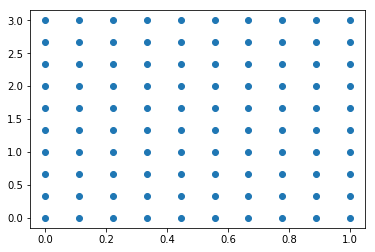

In [3]:
plt.plot(X.flatten(),Y.flatten(),marker='o',linestyle='')
plt.show()

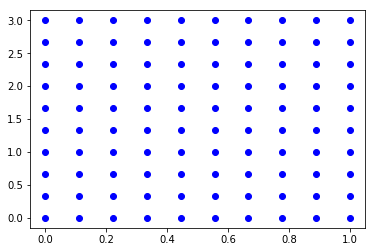

In [4]:
for i in range(len(x)):
    plt.plot(X[i],Y[i],marker='o',linestyle='',color='b')
plt.show()

In [5]:
(X.flatten()[2],Y.flatten()[2])

(0.2222222222222222, 0.0)

In [6]:
(X.flatten(),Y.flatten())

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33

These are arrays, so we can do math with them.


In [7]:
X - Y

array([[ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
         0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ],
       [-0.33333333, -0.22222222, -0.11111111,  0.        ,  0.11111111,
         0.22222222,  0.33333333,  0.44444444,  0.55555556,  0.66666667],
       [-0.66666667, -0.55555556, -0.44444444, -0.33333333, -0.22222222,
        -0.11111111,  0.        ,  0.11111111,  0.22222222,  0.33333333],
       [-1.        , -0.88888889, -0.77777778, -0.66666667, -0.55555556,
        -0.44444444, -0.33333333, -0.22222222, -0.11111111,  0.        ],
       [-1.33333333, -1.22222222, -1.11111111, -1.        , -0.88888889,
        -0.77777778, -0.66666667, -0.55555556, -0.44444444, -0.33333333],
       [-1.66666667, -1.55555556, -1.44444444, -1.33333333, -1.22222222,
        -1.11111111, -1.        , -0.88888889, -0.77777778, -0.66666667],
       [-2.        , -1.88888889, -1.77777778, -1.66666667, -1.55555556,
        -1.44444444, -1.33333333, -1.22222222

In [8]:
np.sqrt(X**2+Y**2)

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.33333333, 0.35136418, 0.40061681, 0.47140452, 0.55555556,
        0.64788354, 0.74535599, 0.84619701, 0.94933375, 1.05409255],
       [0.66666667, 0.6758625 , 0.70272837, 0.74535599, 0.80123362,
        0.86780552, 0.94280904, 1.02439383, 1.11111111, 1.20185043],
       [1.        , 1.0061539 , 1.02439383, 1.05409255, 1.09431753,
        1.1439589 , 1.20185043, 1.26686158, 1.33795495, 1.41421356],
       [1.33333333, 1.33795495, 1.35172501, 1.37436854, 1.40545674,
        1.44444444, 1.49071198, 1.54360489, 1.60246723, 1.66666667],
       [1.66666667, 1.67036626, 1.68141622, 1.69967317, 1.7249083 ,
        1.75682092, 1.79505494, 1.83921615, 1.88888889, 1.94365063],
       [2.        , 2.00308404, 2.01230781, 2.02758751, 2.04878766,
        2.07572685, 2.10818511, 2.14591199, 2.18863507, 2.23606798],
       [2.33333333, 2.33597734, 2.3438914

# $y' = x - y$

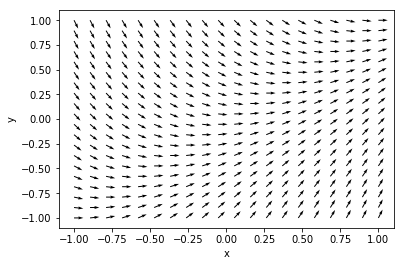

In [9]:
def yprime(x, y):
    return x - y

x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

X, Y = np.meshgrid(x, y)
U = np.ones(X.shape)  # dx/dx
V = yprime(X, Y)  # dy/dx

# This normalizes the arrows so they are all the same unit length
N = np.sqrt(U**2 + V**2)
U = U / N
V /= N

plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
from scipy.integrate import odeint

In [11]:
sol = odeint(yprime, 0, np.linspace(-1, 1),tfirst=True)

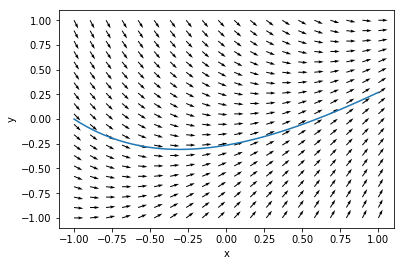

In [12]:
plt.plot(np.linspace(-1, 1), sol)
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

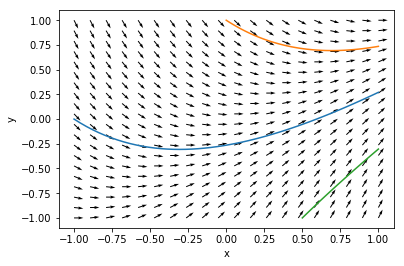

In [13]:
sol2 = odeint(yprime,1,np.linspace(0, 1),tfirst = True)
sol3 = odeint(yprime,-1,np.linspace(0.5, 1),tfirst = True)

plt.plot(np.linspace(-1, 1), sol)
plt.plot(np.linspace(0, 1), sol2)
plt.plot(np.linspace(0.5, 1), sol3)
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# $y'=-y$

You can see the solution looks different depending on the initial condition, but in each case the solution follows the direction field.

Direction field plots can be very helpful to visualize what nearby solutions might look like, or to get a qualitative idea of what a solution might look like, or to see if anything unusual happens in the solution space. We will see them again when we consider systems of differential equations.

**Exercise:** Make a direction field plot for $y'=-y$ for the range of x from 0 to 4. What does the direction field tell you? How does this compare to what you know from the solution?

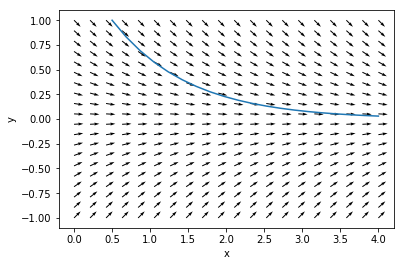

In [14]:
def yprime(x,y):
    return -y

x = np.linspace(0,4,20)
y = np.linspace(-1,1,20)
X, Y = np.meshgrid(x,y)
U = np.ones(X.shape)
V = yprime(X,Y)

N = np.sqrt(U**2+Y**2)
U /= N
V /= N

y_sol = odeint(yprime,1,np.linspace(0.5,4,20),tfirst = True)

plt.plot(np.linspace(0.5,4,20),y_sol)
plt.quiver(X,Y,U,V)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Systems of first-order differential equations

## Chemical reaction

dcA/dt = -k * CA 
<br>
<br>
k = 0.3 
<br>
<br>
cA(0) = 5
<br>
t = 0:20

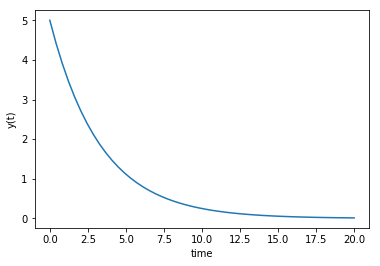

In [15]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Predator-prey model example

**Phase Space**
<br>
We can consider direction fields for systems of ODEs to examine the qualitative behavior of solutions when there are two equations. The key here is to compute for each point (rabbit, fox) we compute (drabbit/dt, dfox/dt), and then plot these.

The Lotka-Volterra model can be used to simulate predator-prey populations. Suppose we have $u$ preys (e.g. rabbits) and $v$ predators (e.g. foxes). Then, we can do a "mass balance" on each species as

$\frac{du}{dt} = a u - b u v$

$\frac{dv}{dt} = -c v + d b u v$

Here $a$ is the natural growth rate of rabbits with no foxes. $b$ is the rate that foxes eat rabbits. $c$ is the rate that foxes die, and $d$ describes how many new foxes result from the rabbits that are eaten. Suppose we start with 10 rabbits and 5 foxes. Plot the number of each species from t=0 to t=15.

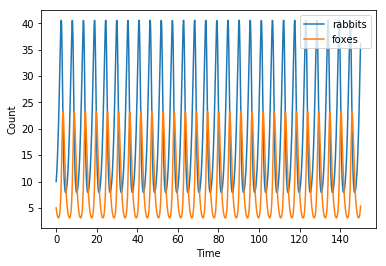

In [16]:
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dXdt(t,X):
    rabbits = X[0]
    foxes = X[1]
    drabbitdt = a*rabbits-b*rabbits*foxes
    dfoxesdt = -c*foxes + d*b*rabbits*foxes
    return np.array([drabbitdt,dfoxesdt])

sol = odeint(dXdt,np.array([10,5]),np.linspace(0,150,1500),tfirst = True)

plt.plot(np.linspace(0,150,1500),sol)
plt.legend(['rabbits','foxes'])
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

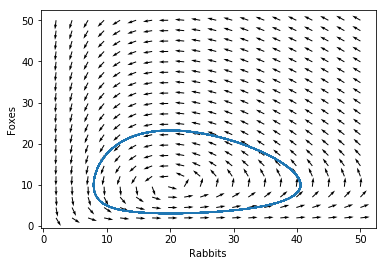

In [17]:
r = np.linspace(2,50,20) # rabbit grid
f = np.linspace(2,50,20) # fox grid

R, F = np.meshgrid(r,f)

DR, DF = dXdt(0,[R, F])

N = np.sqrt(DR**2+DF**2)
DR/=N
DF/=N

plt.quiver(R,F,DR,DF)
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.show()

## Process Tanks

Many engineering systems are governed by *systems of coupled* differential equations. This usually means there are two or more independent variables and outputs, and the rate of change of the outputs depends on two or more of the independent variables.

Let's consider the following tank mixing problem. You have two tanks: Tank A has 30 gallons containing 55 ounces of dissolved salt, and Tank B has 20 gallons containing 26 ounces of salt. Additionally,

-   Water with a salt concentration of 1 oz/gal flows into Tank A at a rate of 1.5 gal/min.
-   Water with a salt concentration of 3 oz/gal flows into Tank B at a rate of 1 gal/min
-   Water flows from Tank A to Tank B at a rate of 3 gal/min.
-   Water flows from Tank B to Tank A at a rate of 1.5 gal/min
-   Water drains from Tank B at a rate of 2.5 gal/min.

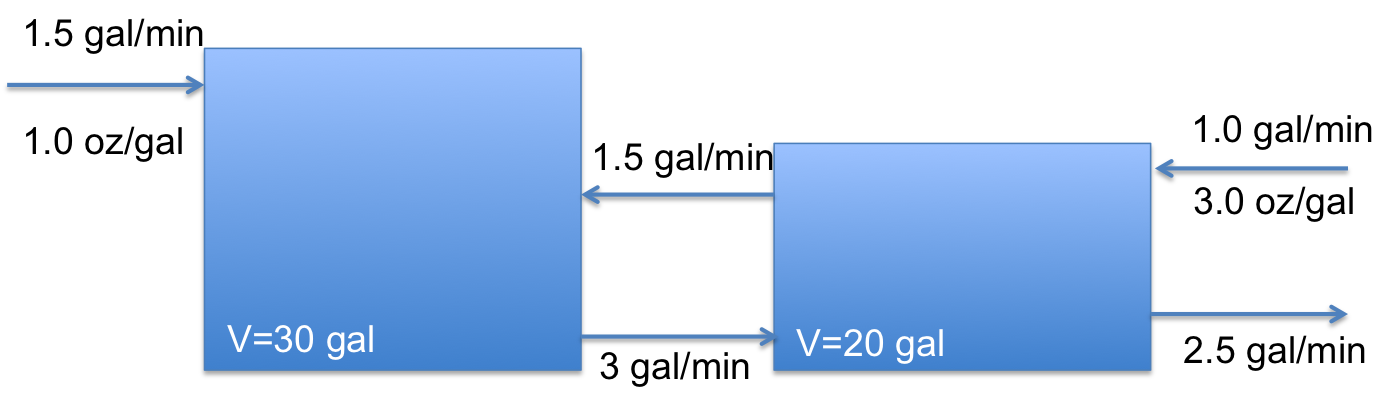

Plot the concentration of salt in Tank A and B as a function of time.

First, we can define initial conditions.


In [18]:
V_A = 30 # gal
V_B = 20 # gal

S_A0 = 55/V_A # oz/gallon in Tank A at T = 0
S_B0 = 26/V_B # oz/gallon in Tank B at T = 0

(S_A0,S_B0)

(1.8333333333333333, 1.3)

In [19]:
f_A = 1.5 # volumetric flow in A, gal/min
C_A = 1   # salt concentration in flow, oz/gal

f_B = 1.0 # volumetric flow in B, gal/min
C_B = 3.0 # salt concentration in flow, oz/gal

f_AB = 3 # flow from A to B, gal/min
f_BA = 1.5 # flow from B to A, gal/min

f_Bexit = 2.5 # volumetric flow out of B gal/min

A_flows = f_A+f_BA-f_AB
B_flows = f_B-f_Bexit+f_AB-f_BA

(A_flows,B_flows)

(0.0, 0.0)

You can see the net volumetric flow in each tank is 0, so we do not have to worry about the volumes changing.

We seek solutions for $S_A(t)$ and $S_B(t)$ where $S_x(t)$ represents the concentration (in oz/gal). Since these change with time, we need to solve the mass balances:

$\frac{dS_A}{dt} = \frac{1}{V_A}(f_A C_A - f_{AB} S_A(t) + f_{BA} S_B(t))$

and

$\frac{dS_B}{dt} = \frac{1}{V_B}(f_B C_B + f_{AB} S_A(t) - F_{BA} S_B(t) - F_{Bexit} S_B(t))$

Before we get into the solution, what should we expect to happen here? The concentration of salt into tank A is less than the initial concentration, and the initial concentration in Tank B is also lower than in Tank A, so we expect the concentration in Tank A to start decreasing. Similarly, we expect the concentration in Tank B to start rising since the concentration in each incoming stream is higher than the initial concentration.

At some point, the two tanks will reach a steady state, but it is not evident how we will approach that steady state. Since the concentration of one stream is higher than all the other concentrations, it is possible for the concentration to go up and then down.


In [20]:
def dSdt(t,S):
    #S in array
    S_A = S[0]
    S_B = S[1]
    dSadt = (f_A*C_A+f_BA*S_B-f_AB*S_A)/V_A
    dSbdt = (f_B*C_B+f_AB*S_A-f_BA*S_B-f_Bexit*S_B)/V_B
    return np.array([dSadt,dSbdt])


sol = odeint(dSdt,np.array([S_A0,S_B0]),np.linspace(0,200,1000),tfirst = True)

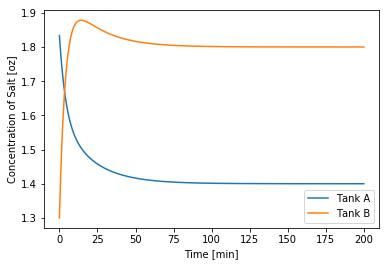

In [21]:
plt.plot(np.linspace(0,200,1000),sol[:,0],label = 'Tank A')
plt.plot(np.linspace(0,200,1000),sol[:,1],label = 'Tank B')
plt.ylabel('Concentration of Salt [oz]')
plt.xlabel('Time [min]')
plt.legend()
plt.show()

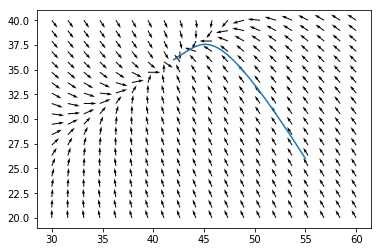

In [22]:
sa = np.linspace(1,2,20)
sb = np.linspace(1,2,20)

SA, SB = np.meshgrid(sa,sb)


DSA, DSB = dSdt(0,[SA, SB])
N = np.sqrt(DSA**2+DSB**2)
DSA /= N
DSB /= N


plt.quiver(SA*V_A,SB*V_B,DSA*V_A,DSB*V_B)
plt.plot(sol[:,0]*V_A,sol[:,1]*V_B)
plt.show()

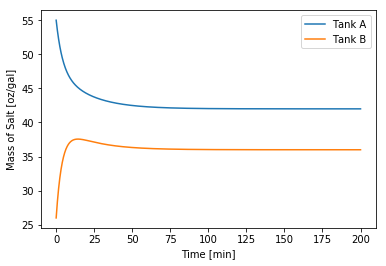

In [23]:
plt.plot(np.linspace(0,200,1000),sol[:,0]*V_A,label = 'Tank A')
plt.plot(np.linspace(0,200,1000),sol[:,1]*V_B,label = 'Tank B')
plt.ylabel('Mass of Salt [oz/gal]')
plt.xlabel('Time [min]')
plt.legend()
plt.show()

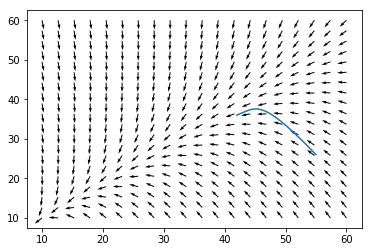

In [24]:
sa = np.linspace(10,60,20)
sb = np.linspace(10,60,20)

SA, SB = np.meshgrid(sa,sb)


DSA, DSB = dSdt(0,[SA, SB])
N = np.sqrt(DSA**2+DSB**2)
DSA /= N
DSB /= N


plt.quiver(SA,SB,DSA,DSB)
plt.plot(sol[:,0]*V_A,sol[:,1]*V_B)
plt.show()

## Process Tanks

So far we have focused on computational solutions to first order differential equations, including systems of first order differential equations. The reason for that is simply that all numerical integration strategies only work with the first derivative.

Many differential equations involve higher order derivatives though. We can solve these by converting them to systems of first-order differential equations through a series of variable changes.

Let's consider the [Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator).

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = 0$

We define a new variable: $v = x'$, and then have $v' = x''$.

That leads to a set of equivalent first-order differential equations:

$x' = v$

$v' - \mu (1-x^2)v + x = 0$

You can still think of $x$ as the position of the oscillator, and $y$ as the velocity of the oscillator. Now, we can integrate these equations from some initial condition.

Let's do this and plot the position and velocity of the oscillator. Rather than use `t_eval`, we will instead set the optional argument `max_step` to tell the solver how often it should make a step.

This is different than using `t_eval`, which uses interpolation *after* the solution has been found to evaluate the solution. This will become important later when we use events, which are only evaluated at the *solver* points.
<br>
mu = 0.2
<br>
t = np.linspace(0,40,500)
<br>
X0 = np.array((1, 2)) # you can pick any x0, and v0 you want.

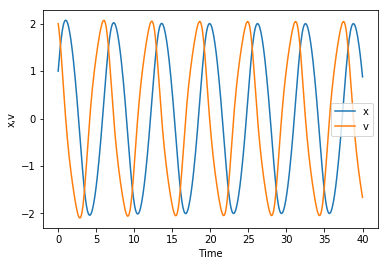

In [25]:
mu = 0.2

def dXdt(t,X):
    x = X[0]
    v = X[1]
    dvdt = mu*(1-x**2)*v-x
    dxdt = v
    return np.array([dxdt,dvdt])

X0 = np.array((1, 2)) # you can pick any x0, and v0 you want.
sol = odeint(dXdt,X0,np.linspace(0,40,500),tfirst=True)

plt.plot(np.linspace(0,40,500),sol)
plt.xlabel('Time')
plt.ylabel('x,v')
plt.legend(['x','v'])
plt.show()

You can see that the solution appears oscillatory. Let's be more quantitative than what it *looks* like. An alternative way to visualize this solution is called the phase portrait where we plot the two state variables (x, v) against each other. We include the starting point for visualization.


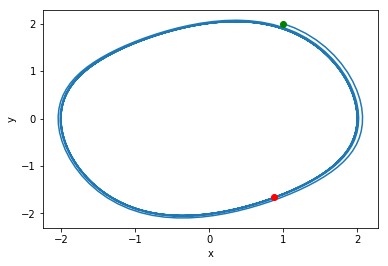

In [26]:
plt.plot(sol[:,0],sol[:,1])
plt.plot(sol[0,0],sol[0,1],'go') # starting point
plt.plot(sol[-1,0],sol[-1,1],'ro') # ending point
plt.xlabel('x')
plt.ylabel('y')
plt.show()